# AML - Assignment N°1

>Nome: **Alessandro**  
Cognome: **Pigato**  
N° Matricola: **852482**  

Dal 2008, ospiti e host hanno utilizzato Airbnb per espandere le possibilità di viaggio e presentare un modo più unico e personalizzato di vivere il mondo. Questo set di dati descrive l'attività e le metriche dell'inserzione a New York, NY per il 2019.
L'obbiettivo di questo compito è cercare di predire il prezzo in base ad alcune variabili nel dataset.

# Import librerie

In [1]:
from keras import *
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.layers import Activation, LeakyReLU
from tensorflow.keras.activations import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
import os 
import statistics
import seaborn as sns

# Import Dataset ed Esplorazione

In [2]:
xtest=pd.read_csv('X_test.csv', index_col=0)
X_train=pd.read_csv('X_train.csv', index_col=0)
y_train=pd.read_csv('y_train.csv', index_col=0)

In [80]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt
0,40.71239,-73.95271,4,2,0.19,1,0,1,0
1,40.69600,-73.91303,4,17,0.66,2,307,1,0
2,40.62707,-74.02817,3,1,0.04,1,87,0,0
3,40.77910,-73.98565,1,4,0.08,1,0,0,1
4,40.75777,-73.93509,1,0,0.00,1,358,1,0
...,...,...,...,...,...,...,...,...,...
33879,40.71187,-73.95864,1,0,0.00,2,0,1,0
33880,40.74123,-73.90152,30,0,0.00,103,247,1,0
33881,40.73375,-73.95570,2,3,0.23,1,0,1,0
33882,40.73660,-73.92358,30,1,0.19,103,252,1,0


In [81]:
y_train

,price
0,65
1,57
2,225
3,175
4,125
...,...
33879,150
33880,59
33881,60
33882,39


Descrizione dei dataset test e train allo scopo di scovare valori anomali.

In [4]:
X_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt
count,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000
mean,392.542285,-767.324528,7.109904,23.391778,1.095455,7.101080,112.995839,0.456085,0.520127
std,3767.009244,7123.758128,20.234836,44.608022,1.610452,32.746915,131.641035,0.498075,0.499602
min,40.499790,-74142.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.690427,-73.983503,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000
50%,40.723640,-73.956025,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,1.000000
75%,40.763910,-73.937005,5.000000,24.000000,1.590000,2.000000,227.000000,1.000000,1.000000
max,40894.000000,-73.712990,1000.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000


In [5]:
xtest.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt
count,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000,3765.000000
mean,397.429772,-623.385344,7.717663,22.546348,1.073421,8.124568,115.432669,0.451262,0.526959
std,3793.819578,6348.269973,31.688428,42.644924,1.553516,37.043267,132.790393,0.497685,0.499339
min,40.507080,-74124.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.689430,-73.984260,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000
50%,40.723370,-73.956270,2.000000,5.000000,0.380000,1.000000,51.000000,0.000000,1.000000
75%,40.763420,-73.935150,5.000000,24.000000,1.550000,2.000000,231.000000,1.000000,1.000000
max,40833.000000,-73.724350,1250.000000,447.000000,20.940000,327.000000,365.000000,1.000000,1.000000


E' evidente come in entrambe i dataset ci siano dei valori anomali nelle coordinate e nel numero minimo di notti.

Da un veloce controllo non risultano nan

In [5]:
X_train.isna().sum()
xtest.isna().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Private_room                      0
Entire_home/apt                   0
dtype: int64

In [221]:
y_train.describe()

,price
count,33884.000000
mean,153.605389
std,249.102710
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Da una breve descrizione del y_train si nota che ci sono valori anomali, procedo a togliere tutte le righe con un valore maggiore di 9000 dato che in alcune località di New York come Manhattan il costo per notte può essere molto alto.

In [121]:
y_train[y_train['price']>9000]

,price
4255,10000
9886,9999
10350,9999
23380,10000
25158,9999


Ora ispeziono le righe con un numero di notti minimo maggiore di 300 per capire se effettivamente vengono affittate per un periodo così lungo

In [3]:
X_train[X_train['minimum_nights']>300]

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt
1950,40.73858,-74.00875,365,0,0.00,1,0,1,0
2097,40.62940,-73.97004,354,0,0.00,1,179,0,1
2973,40.71239,-74.01620,1000,0,0.00,1,362,0,1
4127,40.68458,-73.96805,365,1,0.09,2,0,0,1
4145,40.73317,-73.99813,365,15,0.49,1,0,0,1
4209,40.70898,-73.94885,500,0,0.00,1,331,0,1
4982,40.71141,-73.95155,365,10,0.25,1,365,1,0
5016,40.75164,-73.99425,365,0,0.00,1,365,0,1
8257,40.73085,-74.00079,360,0,0.00,1,365,0,1
8704,40.70940,-74.00278,365,13,0.23,1,365,1,0


Unisco i dataset train, quindi ad ogni riga associo il prezzo per poi eliminare le righe interessate.

In [5]:
merged=X_train.join(y_train)

In [109]:
merged

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,price
count,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000,33884.000000
mean,392.542285,-767.324528,7.109904,23.391778,1.095455,7.101080,112.995839,0.456085,0.520127,153.605389
std,3767.009244,7123.758128,20.234836,44.608022,1.610452,32.746915,131.641035,0.498075,0.499602,249.102710
min,40.499790,-74142.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690427,-73.983503,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,69.000000
50%,40.723640,-73.956025,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,1.000000,106.000000
75%,40.763910,-73.937005,5.000000,24.000000,1.590000,2.000000,227.000000,1.000000,1.000000,175.000000
max,40894.000000,-73.712990,1000.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,10000.000000


Elimino i valori con un numero di notti maggiori di 500 considerando che per questo valore una riga ha 10 recensione, tuttavia vi sono valori 999 e 1000, probabilmente valori completamente errati.

In [6]:
merged=merged[merged.price<9000]
merged=merged[merged.minimum_nights<500]
xtest=xtest[xtest.minimum_nights<500]
X_train = merged.copy()

Creo il dataframe y_train con le righe senza valori anomali.

In [7]:
y_train= pd.DataFrame(X_train['price'])

In [17]:
y_train

,price
0,65
1,57
2,225
3,175
4,125
...,...
33879,150
33880,59
33881,60
33882,39


In [9]:
X_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,price
count,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000
mean,40.728967,-73.952335,6.957074,23.398559,1.095812,7.103242,112.963598,0.456158,0.520076,152.153991
std,0.054465,0.045813,17.121505,44.614194,1.610623,32.752514,131.620059,0.498082,0.499604,218.539370
min,40.499790,-74.240840,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690140,-73.983000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,69.000000
50%,40.723090,-73.955700,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,1.000000,106.000000
75%,40.763220,-73.936640,5.000000,24.000000,1.590000,2.000000,227.000000,1.000000,1.000000,175.000000
max,40.913060,-73.712990,370.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,8500.000000


Nelle colonne longitudine e latitudine si nota subito la presenza di valori anomali, procedo a correggerli sia nel test che nel train

In [8]:
for i in range(len(X_train['latitude'])):
    if abs(X_train.iloc[i,0])>90:
        X_train.iloc[i,0] = X_train.iloc[i,0]/1000

for i in range(len(X_train['longitude'])):
    if abs(X_train.iloc[i,1])>180:
        X_train.iloc[i,1] = X_train.iloc[i,1]/1000

for i in range(len(xtest['latitude'])):
    if abs(xtest.iloc[i,0])>90:
        xtest.iloc[i,0] = xtest.iloc[i,0]/1000

for i in range(len(xtest['longitude'])):
    if abs(xtest.iloc[i,1])>180:
        xtest.iloc[i,1] = xtest.iloc[i,1]/1000

In [10]:
X_train.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,price
count,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000,33872.000000
mean,40.728967,-73.952335,6.957074,23.398559,1.095812,7.103242,112.963598,0.456158,0.520076,152.153991
std,0.054465,0.045813,17.121505,44.614194,1.610623,32.752514,131.620059,0.498082,0.499604,218.539370
min,40.499790,-74.240840,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690140,-73.983000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,69.000000
50%,40.723090,-73.955700,3.000000,5.000000,0.370000,1.000000,45.000000,0.000000,1.000000,106.000000
75%,40.763220,-73.936640,5.000000,24.000000,1.590000,2.000000,227.000000,1.000000,1.000000,175.000000
max,40.913060,-73.712990,370.000000,629.000000,58.500000,327.000000,365.000000,1.000000,1.000000,8500.000000


In [11]:
xtest.describe()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt
count,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000
mean,40.728399,-73.952048,7.124103,22.551422,1.073686,8.127026,115.330853,0.451236,0.526973
std,0.055205,0.047245,18.245862,42.654936,1.553835,37.052914,132.745449,0.497682,0.499338
min,40.507080,-74.242850,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,40.689260,-73.983680,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000
50%,40.722510,-73.955990,2.000000,5.000000,0.380000,1.000000,51.000000,0.000000,1.000000
75%,40.762755,-73.934955,5.000000,24.000000,1.550000,2.000000,230.000000,1.000000,1.000000
max,40.898730,-73.724350,366.000000,447.000000,20.940000,327.000000,365.000000,1.000000,1.000000


Ora i dati relativi alle coordinate ed al numero minimo di notti rientrano nell'intervallo corretto.

# Pre-Processing

Creo una colonna che raggruppa la tipologia di camera, quindi vado a sostituire a private il valore 1, a entire home/apt il valore 2 e ad altre tipologie di camere non definite il valore 3  
Inoltre applico un modello di clustering alle coordinate, in modo da eliminare queste due colonne(longitudine e latitudine) ed avere 5 cluster corrispondenti ai distretti di New York.(Manhattan, Brooklyn, Queens, The Bronx, Staten Island)

In [143]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,price
0,40.71239,-73.95271,4,2,0.19,1,0,1,0,65
1,40.69600,-73.91303,4,17,0.66,2,307,1,0,57
2,40.62707,-74.02817,3,1,0.04,1,87,0,0,225
3,40.77910,-73.98565,1,4,0.08,1,0,0,1,175
4,40.75777,-73.93509,1,0,0.00,1,358,1,0,125
...,...,...,...,...,...,...,...,...,...,...
33879,40.71187,-73.95864,1,0,0.00,2,0,1,0,150
33880,40.74123,-73.90152,30,0,0.00,103,247,1,0,59
33881,40.73375,-73.95570,2,3,0.23,1,0,1,0,60
33882,40.73660,-73.92358,30,1,0.19,103,252,1,0,39


In [12]:
# Creo una funzione dove se la somma tra private ed entire/apt è 0 quindi nessuna delle due ritorna 1
# mentre 0 se anche solo una delle 2 ha valore 1
def conditions(x_train):
    if (x_train['Private_room']+x_train['Entire_home/apt'])==0:
        return 1
    else:
        return 0

In [13]:
# Applico la funzione
X_train['other'] = X_train.apply(conditions, axis=1)

In [2]:
# Funzione dove creo una colonna contente il tipo di camera sostituito da un numero per poi poterlo utilizzare nei modelli
def roomtype(x_train):
    if (x_train['Private_room'])==1:
        return 1
    elif (x_train['Entire_home/apt'])==1:
        return 2
    elif (x_train['other'])==1:
        return 3

In [15]:
# Applico la funzione
X_train['room_type'] = X_train.apply(roomtype, axis=1)

In [16]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,price,other,room_type
0,40.71239,-73.95271,4,2,0.19,1,0,1,0,65,0,1
1,40.69600,-73.91303,4,17,0.66,2,307,1,0,57,0,1
2,40.62707,-74.02817,3,1,0.04,1,87,0,0,225,1,3
3,40.77910,-73.98565,1,4,0.08,1,0,0,1,175,0,2
4,40.75777,-73.93509,1,0,0.00,1,358,1,0,125,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
33879,40.71187,-73.95864,1,0,0.00,2,0,1,0,150,0,1
33880,40.74123,-73.90152,30,0,0.00,103,247,1,0,59,0,1
33881,40.73375,-73.95570,2,3,0.23,1,0,1,0,60,0,1
33882,40.73660,-73.92358,30,1,0.19,103,252,1,0,39,0,1


In [17]:
X=X_train.loc[:,['latitude','longitude']]

Ora utilizzo K-Means per creare 5 cluster, sia nel train che nel test

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X) # Compute k-means clustering.
X_train['cluster_label'] = kmeans.fit_predict(X)

In [91]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,price,other,room_type,cluster_label
0,40.71239,-73.95271,4,2,0.19,1,0,1,0,65,0,1,2
1,40.69600,-73.91303,4,17,0.66,2,307,1,0,57,0,1,2
2,40.62707,-74.02817,3,1,0.04,1,87,0,0,225,1,3,4
3,40.77910,-73.98565,1,4,0.08,1,0,0,1,175,0,2,0
4,40.75777,-73.93509,1,0,0.00,1,358,1,0,125,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33879,40.71187,-73.95864,1,0,0.00,2,0,1,0,150,0,1,2
33880,40.74123,-73.90152,30,0,0.00,103,247,1,0,59,0,1,2
33881,40.73375,-73.95570,2,3,0.23,1,0,1,0,60,0,1,0
33882,40.73660,-73.92358,30,1,0.19,103,252,1,0,39,0,1,2


In [19]:
xtest['other'] = xtest.apply(conditions, axis=1)
xtest['room_type'] = xtest.apply(roomtype, axis=1)
xt=xtest.loc[:,['latitude','longitude']]

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(xt) # Compute k-means clustering.
xtest['cluster_label'] = kmeans.fit_predict(xt)

In [157]:
xtest

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Private_room,Entire_home/apt,other,room_type,cluster_label
0,40.68579,-73.97455,2,4,0.17,1,0,0,1,0,0,2
1,40.67085,-73.92316,1,9,0.61,1,0,1,0,0,1,4
2,40.68817,-73.91523,2,31,1.35,5,0,1,0,0,1,4
3,40.67201,-73.86944,3,0,0.00,2,363,1,0,0,1,3
4,40.68696,-73.92905,1,7,0.19,1,0,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3760,40.58085,-73.93934,2,73,2.15,1,330,0,1,0,0,2
3761,40.82760,-73.94457,1,4,0.85,2,365,1,0,0,1,0
3762,40.68408,-73.95659,1,4,0.30,1,0,0,1,0,0,4
3763,40.78277,-73.95164,2,2,0.03,1,0,0,1,0,0,0


Grafico per evidenziare correlazioni

Text(0.5, 1.0, 'Correlation Matrix')

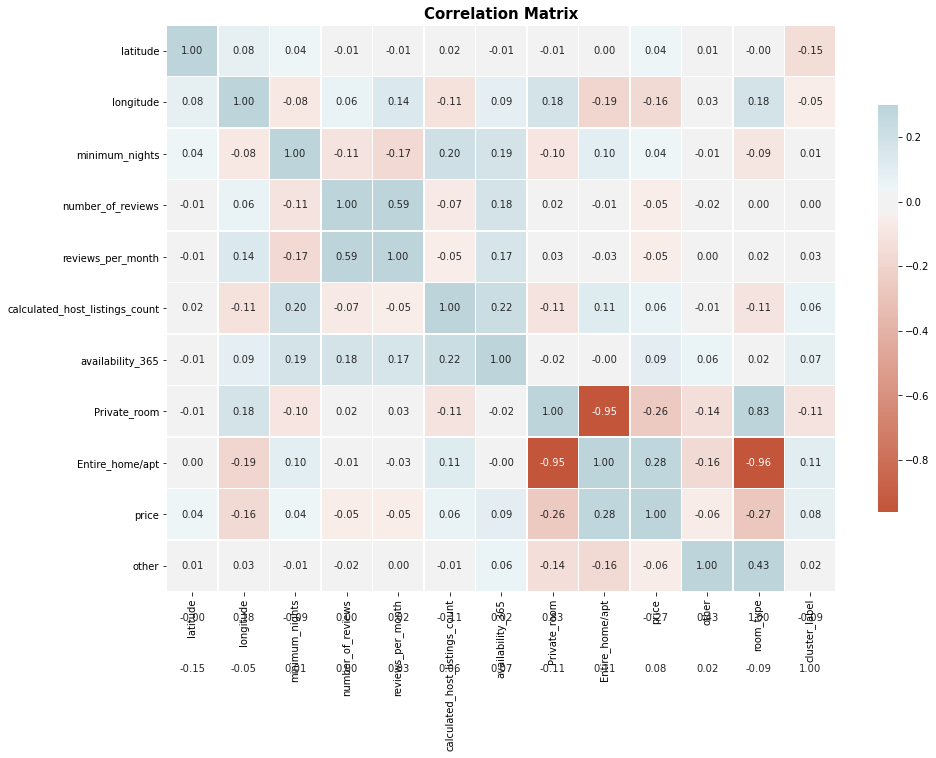

In [31]:
plt.figure(figsize=(15,15))
palette = sns.diverging_palette(20, 220, n=256)
corr=X_train.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

Inserisco la funzione per standardizzare le variabili.

In [21]:
def preprocess_data(X, scaler=None):
    """Preprocess input data by standardise features 
    by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

Ora vado ad eliminare dal dataset tutte quelle conolle che sono state sotituite, quindi inutili.

In [22]:
X_train=X_train.drop(['Private_room','Entire_home/apt','other','latitude','longitude','price'], axis=1)
xtest=xtest.drop(['Private_room','Entire_home/apt','other','latitude','longitude'], axis=1)

Controllo che i dataset siano coerenti tra loro.

In [41]:
xtest

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type,cluster_label
0,2,4,0.17,1,0,2,3
1,1,9,0.61,1,0,1,2
2,2,31,1.35,5,0,1,2
3,3,0,0.00,2,363,1,0
4,1,7,0.19,1,0,1,2
...,...,...,...,...,...,...,...
3760,2,73,2.15,1,330,2,3
3761,1,4,0.85,2,365,1,4
3762,1,4,0.30,1,0,2,2
3763,2,2,0.03,1,0,2,4


In [42]:
X_train

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type,cluster_label
0,4,2,0.19,1,0,1,3
1,4,17,0.66,2,307,1,3
2,3,1,0.04,1,87,3,1
3,1,4,0.08,1,0,2,0
4,1,0,0.00,1,358,1,4
...,...,...,...,...,...,...,...
33879,1,0,0.00,2,0,1,3
33880,30,0,0.00,103,247,1,3
33881,2,3,0.23,1,0,1,0
33882,30,1,0.19,103,252,1,3


### Standardizzazione dataset

In [23]:
X_train, scaler = preprocess_data(X_train)
test_final, _ = preprocess_data(xtest, scaler)
y_train,scalery= preprocess_data(y_train)

# Keras

Definisco i parametri per il train e test con uno split del 30%  
Imposto il random state ad 1, il random_state imposta semplicemente un seme al generatore casuale, in modo che le suddivisioni del test e del train siano sempre deterministiche.

In [24]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [25]:
def NeuralNetwork(X, activation, n_outputs):
    inputs = Input(shape = (X.shape[1])) #T/X/Y/C)
    x = layers.Dense(64, activation = activation) (inputs)
    x = layers.Dense(16, activation = activation) (x)
    x = layers.Dense(n_outputs, activation = 'sigmoid') (x) # the sigmoid output range is [0-1] as our target
    model = Model(inputs, x)
    model.compile(loss = 'mse', optimizer='adam', metrics = [tf.keras.metrics.RootMeanSquaredError()]) #
    return model

In [26]:
# Add the GELU function

def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})

# Add the alpha parameter of the Leaky-Relu function

get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})

# Add the Swish function

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
get_custom_objects().update({'swish': Activation(swish)})

act_func = ['relu', 'elu', 'leaky-relu', 'selu', 'gelu', 'swish']


In [27]:
result = []
for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))
    dims = y_train.shape[1]
    model = NeuralNetwork(activation=activation, X = X_train, n_outputs=dims)
    
    history = model.fit(X_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=0,
          validation_data=(X_validation, y_validation))
    
    result.append(history)
    
    K.clear_session()
    del model


Training with -->relu<-- activation function


Training with -->elu<-- activation function


Training with -->leaky-relu<-- activation function


Training with -->selu<-- activation function


Training with -->gelu<-- activation function


Training with -->swish<-- activation function



<Figure size 720x504 with 0 Axes>

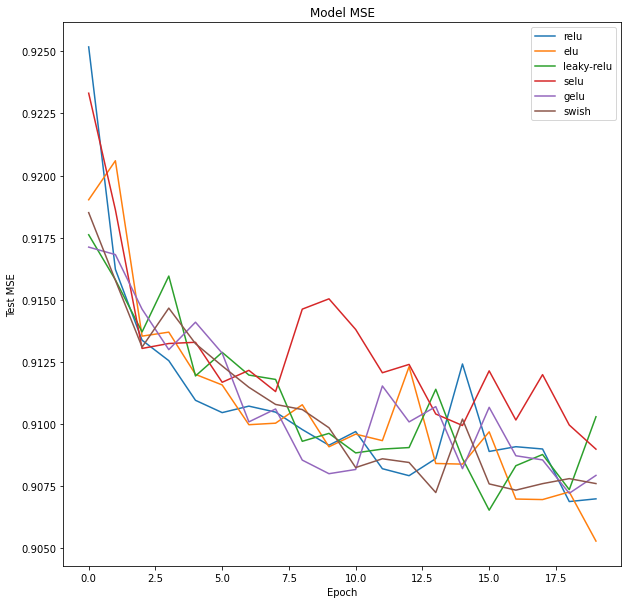

In [28]:
rmse_finale = []

def risultati(activation_function, rmse):
    for i in range(len(activation_function)):
        print('RMSE of the activation function {} is {}'.format(activation_function[i], round(rmse[i], 5)))
        
def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,7))
    
    # Plot of the validation root mean squared error
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_root_mean_squared_error'])
        rmse_finale.append(act_func.history['val_root_mean_squared_error'][-1])
    
    plt.title('Model MSE')
    plt.ylabel('Test MSE')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(result, act_func)

In [29]:
risultati(act_func,rmse_finale)

RMSE of the activation function relu is 0.90698
RMSE of the activation function elu is 0.90528
RMSE of the activation function leaky-relu is 0.91029
RMSE of the activation function selu is 0.90898
RMSE of the activation function gelu is 0.90792
RMSE of the activation function swish is 0.90759


Il modello migliore risulta essere il elu con un RMSE dello 0.9052

# Predict Function

In [ ]:
model = NeuralNetwork(activation=activation, X = X_train, n_outputs=dims)
model.summary()
model.fit(X_train, y_train,
          batch_size=16,
          epochs=20,
          verbose=1,
          validation_data=(X_validation, y_validation))


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1482/1482 [==============================] - 1s 757us/step - loss: 1.0034 - root_mean_squared_error: 1.0017 - val_loss: 0.8480 - val_root_mean_squared_error: 0.9209
Epoch 2/20
1482/1482 [==============================] - 1s 678us/step - lo

In [25]:
y_test = model.predict(test_final)

In [26]:
y_test=scalery.inverse_transform(y_test)

Salvo il risultato in un file txt

In [28]:
out_file = open("alessandro_pigato_852482_score1.txt","w")
for i in y_test:
    out_file.write(str(i)+'\n')
out_file.close()